## Actividad 1. Funciones y tipos de variables
#### Mario Guerra Gualy

### Cargue de Librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None)

### Cargue archivo

In [11]:
df_ingresos=pd.read_csv("ARCHIVOS/census_income.csv", sep=",", index_col=0)
df_ingresos.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Detalle de variables en el conjunto de datos

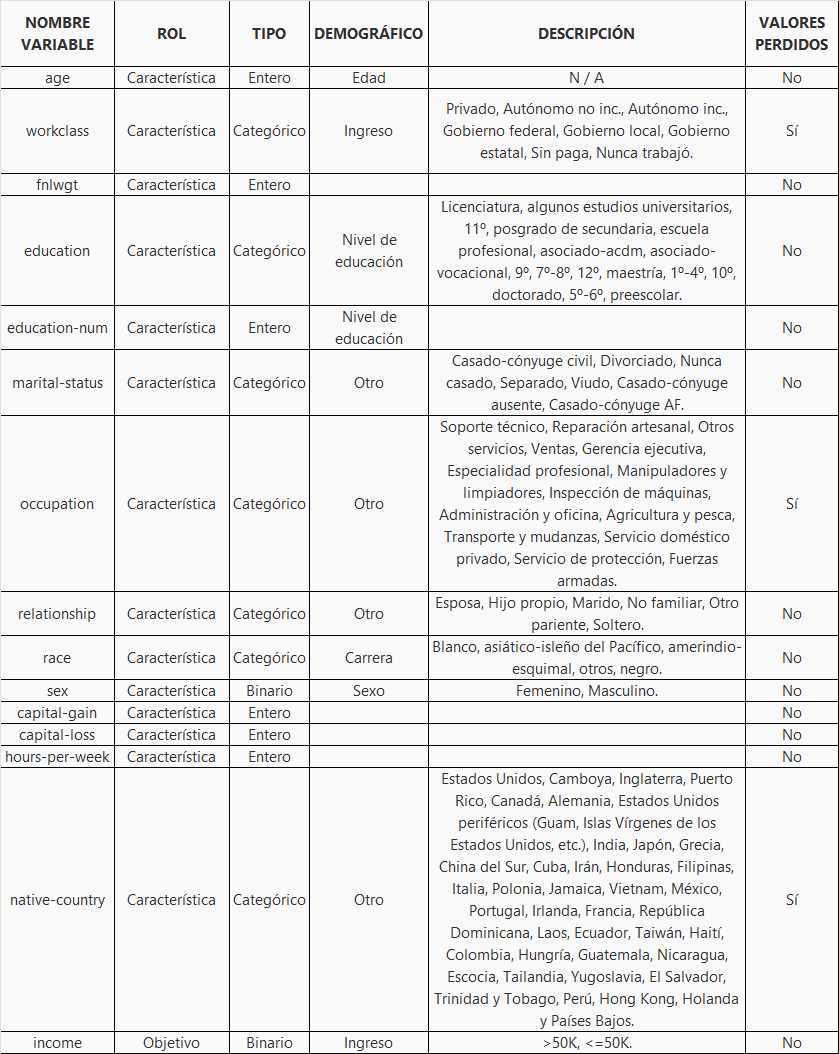50K, <=50K.	No


Podemos observar que este conjunto de datos representa los datos demograficos de adultos para a partir de ellos determinar si su ingresos son mayores o no a $50.000/año. Cambiaremos los nombres de las columnas a español

In [14]:
df_ingresos.columns=['anio','clase_trabajo','fnlwt','educacion','nivel_educacion','estado_civil','ocupacion','relacion','raza','sexo','capital_ganado','capital_perdido','horasxsemana','pais_nativo','ingresos']

In [15]:
df_ingresos.shape

(48842, 15)

In [13]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   anio             48842 non-null  int64 
 1   clase_trabajo    47879 non-null  object
 2   fnlwt            48842 non-null  int64 
 3   educacion        48842 non-null  object
 4   nivel_educacion  48842 non-null  int64 
 5   estado_civil     48842 non-null  object
 6   ocupacion        47876 non-null  object
 7   relacion         48842 non-null  object
 8   raza             48842 non-null  object
 9   sexo             48842 non-null  object
 10  capital_ganado   48842 non-null  int64 
 11  capital_perdido  48842 non-null  int64 
 12  horasxsemana     48842 non-null  int64 
 13  pais_nativo      48568 non-null  object
 14  ingresos         48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


El informe resumen nos muestra que son 48842 registros con un total de 15 columnas. Observamos que hay tres columnas que presenta valores nulos, entemos a analizar cada una de ellas

#### Columna Clase trabajo

In [19]:
df_ingresos['clase_trabajo'].nunique(dropna=False)

10

Se encuentran 10 tipos de categorias de trabajos, los cuales son:

In [21]:
df_ingresos['clase_trabajo'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

El conteo de registros por clase de trabajo es el siguiente:

In [22]:
df_ingresos['clase_trabajo'].value_counts(dropna=False)

clase_trabajo
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
NaN                   963
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Para clase de trabajo se Observa que la mayoria de personas tiene un trabajo en empresas privadas, vemos un tipo de trabajo con ?(1836 registros), que puede significar que es un error en el ingreso de los datos y tenemos 963 registros nulos, como validaremos continuación:

In [8]:
df_ingresos['clase_trabajo'].isnull().sum()

963

#### Columna Ocupacion

In [23]:
df_ingresos['ocupacion'].nunique(dropna=False)

16

Se evidencia 16 tipos de ocupación, los cuales son:

In [25]:
df_ingresos['ocupacion'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

El conteo de registros por ocuapcion es el siguiente:

In [26]:
df_ingresos['ocupacion'].value_counts(dropna=False)

ocupacion
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
NaN                   966
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

las ocuapciones estan ams equilibradas a nivel de datos, la mayor ocuapcion es los profesioanles especializados, seguido de los encargados de reparacion, vemos nuevamente  una ocupacion con nombre ?, esto debe ser un error de digitacion y hay 966 vacios, como se valida a continuacion:

In [27]:
df_ingresos['ocupacion'].isnull().sum()

966

#### Columna Pais nativo

In [28]:
df_ingresos['pais_nativo'].nunique(dropna=False)

43

Se evidencia un alto numero de paises, esto permite tener una base de datos diversa,ya que las condiciones laborales son muy diferentes en cada pais, los paises son los siguientes:

In [29]:
df_ingresos['pais_nativo'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

El conteo de registros por pais es el siguiente:

In [30]:
df_ingresos['pais_nativo'].value_counts(dropna=False)

pais_nativo
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
NaN                             274
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua       

Aca se nota un desbalanceo de losd atos ya que la mayor de la poblacion es de estados unidos, nuevamente se evidencia datos registrados al valor ? y se encuentran 274 registros nulos, como se valida a continuacion:

In [31]:
df_ingresos['pais_nativo'].isnull().sum()

274

#### Valores estadisticos

In [32]:
df_ingresos.describe(include='object')

,clase_trabajo,educacion,estado_civil,ocupacion,relacion,raza,sexo,pais_nativo,ingresos
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


Otra forma de ver los datos resumidos, en donde nos enfocamos en los datos categoricos, los demas datos son numericos

In [33]:
df_ingresos.describe()

,anio,fnlwt,nivel_educacion,capital_ganado,capital_perdido,horasxsemana
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Conclusión

Los datos analizados de este conjuntos de datos de ingresos, vemos que tiene un debalanceo por parte del pais, pero por los tipos de trabajo y ocupaciones esta mas balanceado, adicional tiene registros mal diligenciados que púde afectar un poco en la toamde ddesiones, los valore nulos no son muy representativos, en posteriores actividesde se trabajará en como podemso limpiar estos conjuntos de datos